In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import seaborn as sns
sns.set()

# Read-In Data

In [2]:
data_path = "data/"
raw_data = pd.read_csv(data_path+"winequality-red.csv", delimiter=';')
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data = raw_data.copy()

In [4]:
# Find range of quality
print(min(data["quality"]))
print(max(data["quality"])) 

3
8


In [5]:
data.describe(include="all") 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.isnull().sum() # No Null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data.shape[0] # Number of rows

1599

# Check Ordinary Least Squares (OLS) Assumptions

In [8]:
features = data.iloc[:,:-1]
features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5


In [9]:
print(features.shape[1])

11


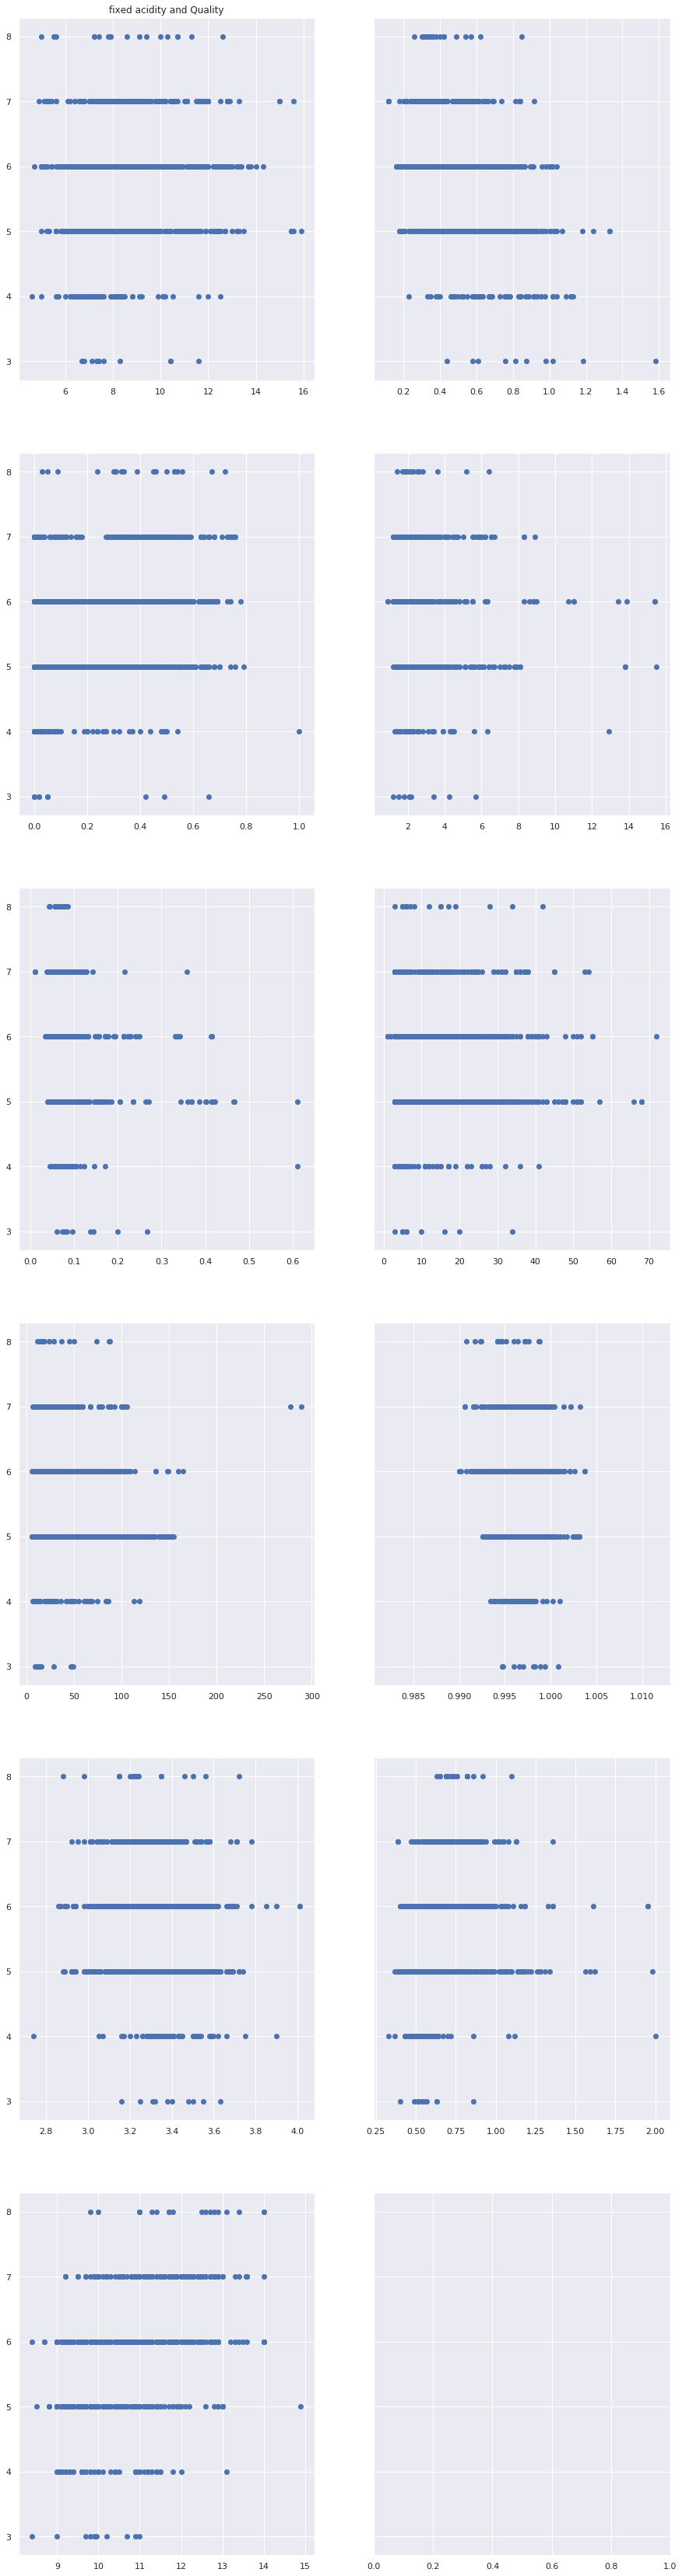

In [10]:
fig, axes = plt.subplots(6,2, sharey=True, figsize=(15,60))
feature_list = features.columns.values

ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12 = axes.flatten()

ax1.scatter(data[feature_list[0]],data["quality"])
ax1.set_title(feature_list[0]+" and Quality")

ax2.scatter(data[feature_list[1]],data["quality"])
ax3.scatter(data[feature_list[2]],data["quality"])
ax4.scatter(data[feature_list[3]],data["quality"])
ax5.scatter(data[feature_list[4]],data["quality"])
ax6.scatter(data[feature_list[5]],data["quality"])
ax7.scatter(data[feature_list[6]],data["quality"])
ax8.scatter(data[feature_list[7]],data["quality"])
ax9.scatter(data[feature_list[8]],data["quality"])
ax10.scatter(data[feature_list[9]],data["quality"])
ax11.scatter(data[feature_list[10]],data["quality"])

plt.show()

### It doesn't look like a linear regression will do well with this data. Now let's convert this problem into a logistic regression problem.

# Check Distribution of Quality

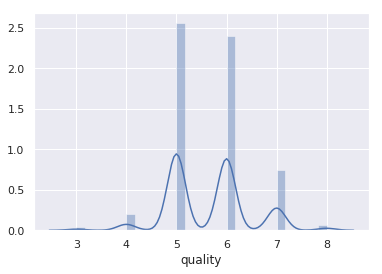

In [11]:
sns.distplot(data["quality"])

# Turning into logistic regression

In [12]:
# Creating targets
quality_mean = data["quality"].mean()
quality_mean

5.6360225140712945

So, anything above the median will be a 1 and anything less will be a 0

In [13]:
# np.where(condition, value if true, value if false)
targets = np.where(data["quality"] > quality_mean, 1, 0)
print(sum(targets)/len(targets)) # ratio of 1's to 0's

0.5347091932457786


In [14]:
# Replace quality column with 1's and 0's (depending on if value was greater than or less than mean)
data = data.drop(["quality"], axis=1)
data["quality"] = targets
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# Standardize Inputs

In [15]:
scaler = StandardScaler()
scaler.fit(features)
scaled_inputs = scaler.transform(features)

In [16]:
scaled_inputs

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [17]:
scaled_inputs.shape

(1599, 11)

# Split Data

In [18]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(scaled_inputs, targets, train_size=0.8, shuffle=True, random_state=42)

In [19]:
print(inputs_train.shape,targets_train.shape)

(1279, 11) (1279,)


In [20]:
print(inputs_test.shape,targets_test.shape)

(320, 11) (320,)


# Logistic Regression Model

In [21]:
reg = LogisticRegression()
reg.fit(inputs_train, targets_train)

/home/brandon/Dev/Data-Science/virtualenvironment/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
reg.score(inputs_train,targets_train)

0.7521501172791243

In [23]:
print("Accuracy:",reg.score(inputs_test, targets_test)*100,"%")

Accuracy: 74.0625 %


I believe the accuracy is only 74% because the quality of the wine is subjective and people have different tastes, making it difficult to predict what will and won't be above the average quality score. However, using the summary table that is created below, we may be able to find the factors that influence the quality score given to the wine.

# Summary Table

In [24]:
summary_table = pd.DataFrame(columns=["Feature Name"], data=feature_list)

summary_table["Coefficient"] = np.transpose(reg.coef_)

summary_table.index = summary_table.index+1
summary_table.loc[0] = ["Intercept", reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature Name,Coefficient
0,Intercept,0.213837
1,fixed acidity,0.204937
2,volatile acidity,-0.527711
3,citric acid,-0.198306
4,residual sugar,0.021834
5,chlorides,-0.177134
6,free sulfur dioxide,0.308691
7,total sulfur dioxide,-0.597391
8,density,-0.051990
9,pH,-0.049661


In [25]:
# Make coefficients more understanadable
summary_table["Odds Ratio"] = np.exp(summary_table.Coefficient)          # Add Odds Ratio column
summary_table = summary_table.sort_values("Odds Ratio", ascending=False) # Sort from most important to least
summary_table

,Feature Name,Coefficient,Odds Ratio
11,alcohol,0.942317,2.565921
10,sulphates,0.449277,1.567179
6,free sulfur dioxide,0.308691,1.361642
0,Intercept,0.213837,1.238421
1,fixed acidity,0.204937,1.227448
4,residual sugar,0.021834,1.022074
9,pH,-0.049661,0.951552
8,density,-0.051990,0.949339
5,chlorides,-0.177134,0.837668
3,citric acid,-0.198306,0.820119


Not a big factor if coefficient is close to 0 and Odds Ratio is close to 1. Looks like the alcohol content is the most important factor for the quality. Other important factors are sulphates, free sulfurr dioxide, and fixed acidity. 